In [1]:
## import pandas and numpy

import pandas as pd
import numpy as np

In [2]:
## Load the train and test csv files as pandas Dataframe

train = pd.read_csv('Train.txt')
test = pd.read_csv('Test.txt')

In [3]:
## We concat these two Dataframes and insert an additional column to Identify them both

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
## Preview Data

data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [5]:
## Verify the size of train, test and concatenated data each

print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
## Display the Data stats

data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [7]:
## Check for null values in each column

data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [8]:
## Check for unique values in each column

data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [9]:
## Get all the categorical columns

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object' and x not in ['Item_Identifier','Outlet_Identifier','source']]

In [10]:
## Display the count of each category for each categorical column

for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

In [11]:
## Imputing (Replacing) missing Item weights by the the average weight of items having similar ID 

# Determine the average weight per group of items having same ID
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

# Get a boolean list specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

# Impute missing weights by that of average weight of similar Items (i.e. having similar Item_Identifier value)
# and check missing values before and after imputation to confirm
print('Orignal #missing: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [12]:
## Imputing (Replacing) missing Outlet size by the mode of outlets having similar 'Outlet type' 

# Import mode function
from scipy.stats import mode

# Determing the mode for each missing outlet size grouped by outlet type
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

# Get a boolean list specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

# Impute missing outlet size by that of similar outlet type and check missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
Final #missing: 0


In [13]:
## Imputing (Replacing) cells with Item Visibility as zero by the the average visibility of items having similar ID 

# Determine the average Item visibility per group of items having same ID
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# Get a boolean list specifying missing Item_Weight values
miss_bool = data['Item_Visibility'] == 0

# Impute zero item visibility by that of average visibility of similar Items (i.e. having similar Item_Identifier value)
# and check missing values before and after imputation to confirm
print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [14]:
## Create a new column as Item visibility mean ratio to capture mean visibility of products across all stores.
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)

In [15]:
## Get the item type from the first 2 characters of the Item Identifier
## and convert them to human understandable values

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR': 'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [16]:
## Create a new column depicting the years of operation of a store

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [17]:
## Modify Item_Fat_Content column to convert the abbreviations to similar values


print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [18]:
## Assign value "Non-Edible" in column Item_Fat_Content to Items which are not edible

data.loc[data['Item_Type_Combined']=="Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"
print(data['Item_Fat_Content'].value_counts())

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


In [19]:
## Converting Categorical variables to Numerics

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [20]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,26,1


In [21]:
## One hot ecoding of Categorical columns

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [22]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [23]:
## Drop the columns which have been converted to different types

data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [24]:
## Divide into test and train using column source

train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [25]:
## Drop unnecessary columns

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
## Export files as modified versions:

train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [27]:
## Export Output file with predicted vales as the mean sales in training data to get a bench mark

mean_sales = train['Item_Outlet_Sales'].mean()

base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

base1.to_csv("alg0.csv",index=False)

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
## Function to perform training using Cross validation, predicting sales for test data and exporting the output file

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    alg.fit(dtrain[predictors],dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target] = alg.predict(dtest[predictors])
    IDcol.append(target)
    
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.41 | Min - 1075 | Max - 1211


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


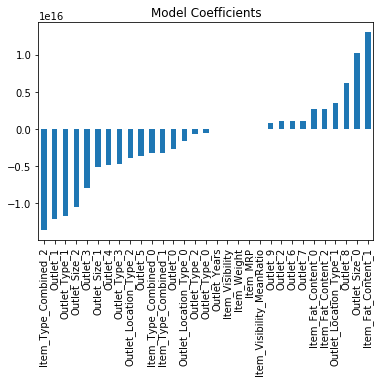

In [29]:
## Using Linear Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.show()


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.63 | Min - 1075 | Max - 1211


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


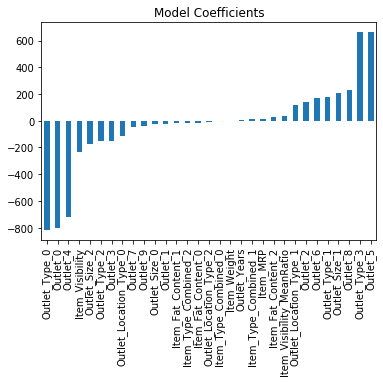

In [30]:
## Using Linear Regression with different parameters

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.01,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')
plt.show()


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


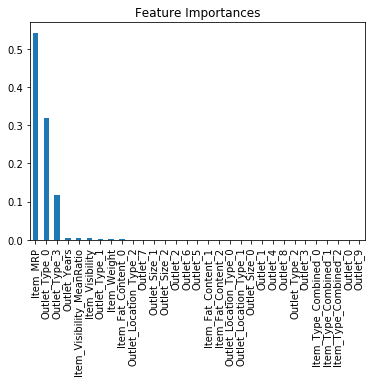

In [31]:
## Using decision tree Regressor to train and display important features

from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


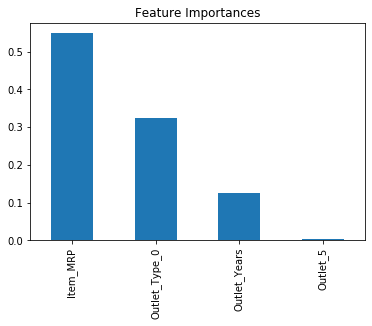

In [32]:
## Using decision tree Regressor with only important features and different parameters

predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.55 | Min - 1020 | Max - 1161


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


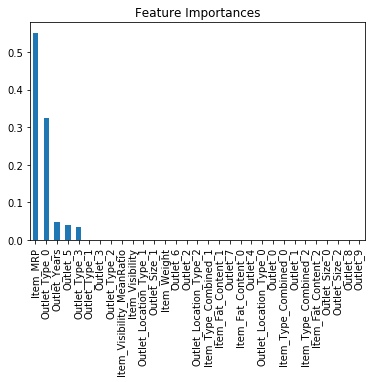

In [33]:
## Using Random Forest regressor to train and display important features

from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.93 | Min - 1021 | Max - 1162


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


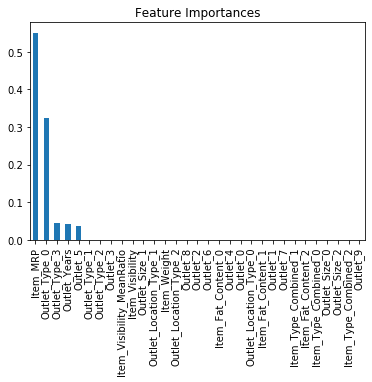

In [34]:
## Using Random Forest regressor with different parameters and plot important features

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

In [35]:
## Using RANSAC regressor

from sklearn.linear_model import RANSACRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg7 = RANSACRegressor(min_samples=5, max_trials=10000000, random_state=0)
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')


Model Report
RMSE : 1281
CV Score : Mean - 1392 | Std - 90.18 | Min - 1242 | Max - 1582


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### We see that the DecisionTreeRegressor gives us the best RMSE